## Assignment 4: Obsevational Studies and Applied ML

### Deadline
November 21st,11:59PM

### Important notes

Make sure you push on GitHub your notebook with all the cells already evaluated. Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented. Back up any hypotheses and claims with data, since this is an important aspect of the course. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything.

Use this legendary link to create your repository: [link](https://classroom.github.com/g/YXtsr0QK)

TA Reviews

Grade for Textual Description: 5.75

Grade for Code Quality: 5.0

Grade for Results: 4.5

Comments: 

Results : In task 1C & 1D, you should have used the same scale on the plots to make them comparable. You could also have but the three {scatter plots + regression line} on the same figure (that was the best option here). Your interpretation at the end of 1D is not perfectly right, for group B the coefficient il also negative but when broken down to stats each one is positive. That's the `Simpson paradox` here that you should have noticed. In task 2 you should normalize the data using only the mean and std computed on the training set. Your confusion matrix is a bit poor, it could have been enhanced with colors using matplotlib or seaborn. It is also a very poor choice of visualization for the 7 measures of performance (plotting 7 curves was much more simple and much more interpretable). 

In task 2B eventually it is not clear that you noticed what is the best metric here (negative precision) because we want to make sure that all animals that are about to be killed are indeed not adoptable.

Code quality : In 1D you forgot to change the name of the state in your print calls for Rhode Island, that's what happens when using copy/paste. You need to pay more attention to vectorization, it should be reflex at this point. Your computation of the confusion matrix is inefficient for example. You also need to improve conciseness. Defining distinct functions to compute the 7 scores is really painful tu read. You just need to compute the confusion matrix and then a single function returning the scores in a few lines.

Textual description : Some descriptions could use conciseness.

In [1]:
# Put your imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from pandas.plotting import scatter_matrix
import seaborn as sns
import scipy
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
data_folder = './data/'

### *Reference*

*Some explanations for mathematics concepts (eg. comparison of Spearman and Pearson correlation coefficient) come from scipy and wikipedia.*

[Spearman correlation coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)

[Scipy.stats.spearmanr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html)

[P value](https://en.wikipedia.org/wiki/P-value)

## Task 1: Boosting the economy by incentivizing self-employment

Assume the biggest priority of the local government in 2018 is to increase per-capita income. To do so, the officials plan to adopt a strategy for incentivizing self-employment through a series of campaigns, educational programs, and dedicated funds.

Since it is unethical and impossible in this setting to run a controlled experiment involving citizens (e.g., fire employees and force them to self-employ), the officials have asked you, the data scientist, to establish the effect of self-employment on the economy, relying on observational data.

**A)** You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest?

**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning.

Hint: It is useful to add a notion of confidence to your results and explore the data visually. You are allowed to use the SciPy library.

**A)** You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

In [33]:
county_data = pd.read_csv('./data/acs2015_county_data.csv')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


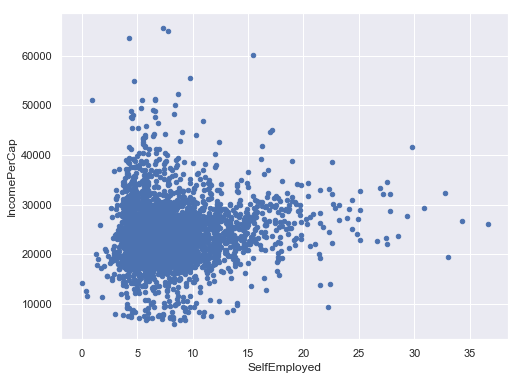

In [34]:
# visualize the relationship between the the percentage of self-employed citizens and per capita income
county_data.plot(kind='scatter', x='SelfEmployed', y='IncomePerCap', figsize=(8, 6), grid=True)
plt.show()

From the plot we can see that there is not explicit linear relationship between percentage of self employment and per capita income for the whole county data. Therefore to quantify the dependency of this two feature, we'd better use spearman corelation coefficiency rather than pearson coefficiency, which is focused on linear relation between features and is not suitable for county data.

In [35]:
# Pearson benchmarks linear relationship, Spearman benchmarks monotonic relationship
# The Spearman correlation is a nonparametric measure of the monotonicity of the relationship between two datasets. 
correlation,pvalue = scipy.stats.spearmanr(county_data['IncomePerCap'],county_data['SelfEmployed'])
print("The Spearman coefficiency for whole county data is {:.3} and p-value is: {:.3}\n".format(
    correlation, pvalue))

The Spearman coefficiency for whole county data is 0.0564 and p-value is: 0.00136



The null hypothesis for scipy.stats.spearmanr is that the two features are not correlated. In statistics, p value < 0.05 means that we can reject the null hypothesis. So with p-value = 0.00136 we have the confidence of 95% that percentage of self employment and per capita income are correlated with the spearman coefficiency of 0.0564.

However, 0.0564 is too small that we can hardly say higher self employment can improve per capita income. 

**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.


In [36]:
setA = county_data.query('State==["Wisconsin","Tennessee", "Minnesota"]')[['State','IncomePerCap','SelfEmployed']]
Wiscon = setA.loc[setA['State']=="Wisconsin"]
Tenne = setA.loc[setA['State']=="Tennessee"]
Minne = setA.loc[setA['State']=="Minnesota"]

Text(0.5, 1.0, 'Distribution of self employment and income for setA')

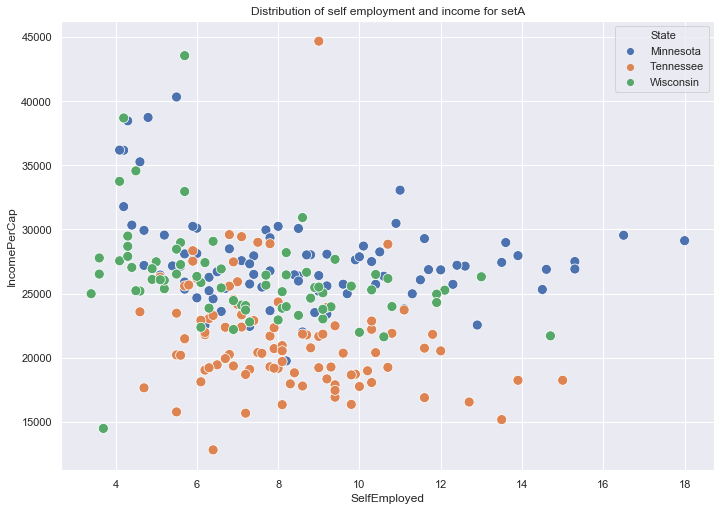

In [94]:
sns.scatterplot(x='SelfEmployed', y='IncomePerCap', hue="State", data=setA,s=100)
plt.title('Distribution of self employment and income for setA')

In [38]:
correlationA,pvalueA = scipy.stats.spearmanr(setA['IncomePerCap'],setA['SelfEmployed'])
print("The Spearman coefficiency for setA data is {:.3} and p-value is: {:.3}\n".format(
    correlationA, pvalueA))

The Spearman coefficiency for setA data is -0.237 and p-value is: 0.00014



In setA, the p value is still smaller than 0.01 and the 99% confidence still holds. Compared to whole county data, the absolute value of coefficiency for set A is higher and implies stronger monotonicity for percentage of self employment and income per capita.

However, the coefficiency is negative, meaning that higher self employment has negative influence on income per capita.

**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest?


In this part, we plot and calculate correlation coefficiency respectively for each state.

In [39]:
spearmanWiscon,pvalueWiscon = scipy.stats.spearmanr(Wiscon['IncomePerCap'],Wiscon['SelfEmployed'])
print("The Spearman coefficiency for Wisconsin is {:.3} and p-value is: {:.3}\n".format(
    spearmanWiscon, pvalueWiscon))

pearsonWiscon,pvalueWiscon = scipy.stats.pearsonr(Wiscon['IncomePerCap'],Wiscon['SelfEmployed'])
print("The Pearson coefficiency for Wisconsin is {:.3} and p-value is: {:.3}\n".format(
    pearsonWiscon, pvalueWiscon))

The Spearman coefficiency for Wisconsin is -0.464 and p-value is: 4.12e-05

The Pearson coefficiency for Wisconsin is -0.329 and p-value is: 0.00477



In [40]:
spearmanTenne,pvalueTenne = scipy.stats.spearmanr(Tenne['IncomePerCap'],Tenne['SelfEmployed'])
print("The Spearman coefficiency for Tennessee is {:.3} and p-value is: {:.3}\n".format(
    spearmanTenne, pvalueTenne))

pearsonTenne,pvalueTenne = scipy.stats.pearsonr(Tenne['IncomePerCap'],Tenne['SelfEmployed'])
print("The Pearson coefficiency for Tennessee is {:.3} and p-value is: {:.3}\n".format(
    pearsonTenne, pvalueTenne))

The Spearman coefficiency for Tennessee is -0.317 and p-value is: 0.00175

The Pearson coefficiency for Tennessee is -0.238 and p-value is: 0.02



In [41]:
spearmanMinne,pvalueMinne = scipy.stats.spearmanr(Minne['IncomePerCap'],Minne['SelfEmployed'])
print("The Spearman coefficiency for Minnesota is {:.3} and p-value is: {:.3}\n".format(
    spearmanMinne, pvalueMinne))

pearsonMinne,pvalueMinne = scipy.stats.pearsonr(Minne['IncomePerCap'],Minne['SelfEmployed'])
print("The Pearson coefficiency for Minnesota is {:.3} and p-value is: {:.3}\n".format(
    pearsonMinne, pvalueMinne))

The Spearman coefficiency for Minnesota is -0.211 and p-value is: 0.0497

The Pearson coefficiency for Minnesota is -0.254 and p-value is: 0.0177



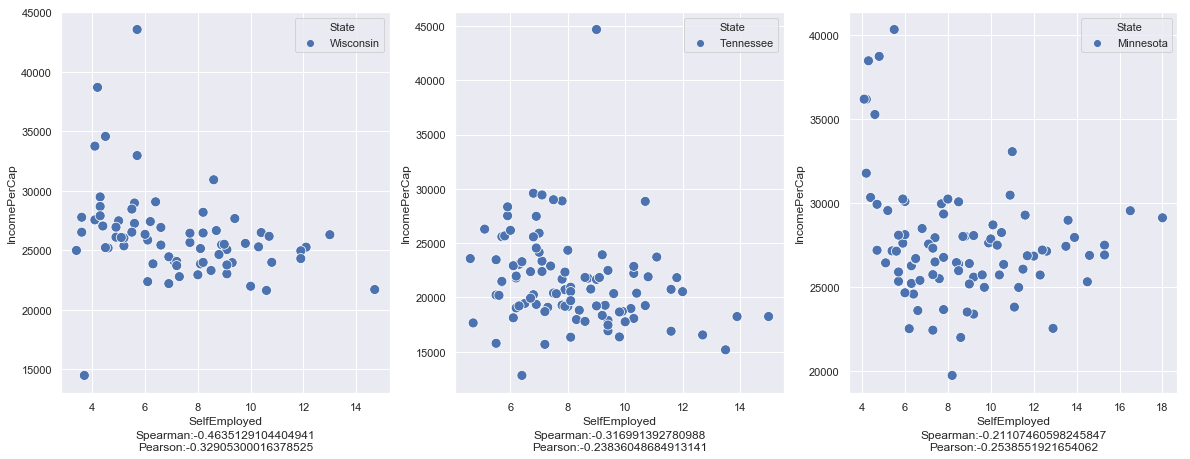

In [139]:
fig,ax = plt.subplots(1,3,figsize=(20,7))
datas = [Wiscon,Tenne,Minne]
names = ['Wiscon','Tenne','Minne']
for i in range(len(ax)):
    sns.scatterplot(x='SelfEmployed', y='IncomePerCap', hue="State", data=datas[i],ax=ax[i],s=100)
    coefficiencies = 'Spearman:'+str(eval('spearman'+names[i]))+'\nPearson:'+str(eval('pearson'+names[i]))
    ax[i].text(0.5,-0.15,coefficiencies,ha="center",transform=ax[i].transAxes)


All p-values for coefficients are smaller than 0.05, so we have confidence of 95% to say that self employment and income are correlated. Among these three state, Wisconsin has the strongest correlation, with Spearman coefficient=-0.46, Pearson coefficient=-0.32.

**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning.


In [43]:
setB = county_data.query('State==["New Jersey", "Kansas", "Rhode Island"]')[['State','IncomePerCap','SelfEmployed']]

Text(0.5, 1.0, 'Distribution of self employment and income for setB')

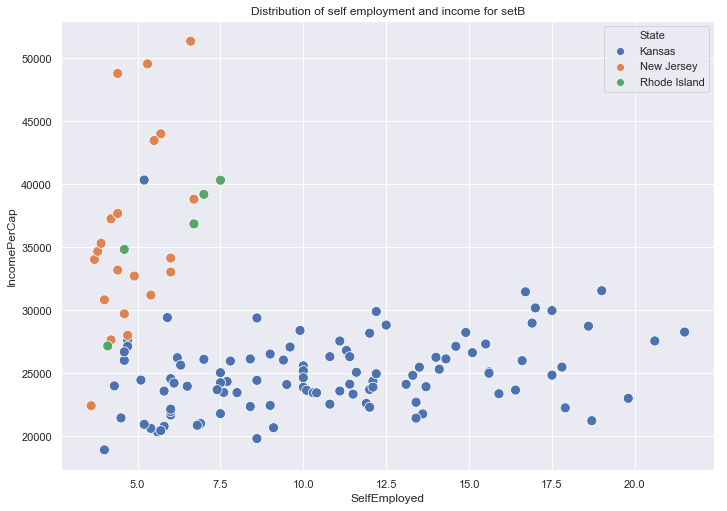

In [95]:
sns.scatterplot(x='SelfEmployed', y='IncomePerCap', hue="State", data=setB,s=100)
plt.title('Distribution of self employment and income for setB')

In [45]:
correlationB,pvalueB = scipy.stats.spearmanr(setB['IncomePerCap'],setB['SelfEmployed'])
print("The Spearman coefficiency for setB data is {:.3} and p-value is: {:.3}\n".format(
    correlationB, pvalueB))

The Spearman coefficiency for setB data is -0.16 and p-value is: 0.0677



In [46]:
scipy.stats.pearsonr(setB['IncomePerCap'],setB['SelfEmployed'])

(-0.2322214134608569, 0.007607493042857412)

The distribution of setB is quite different from that of setA, especially when we plot with states. In setA different state data are mixed together, while in setB we can see clearly that data Kansas is almost independent from New Jersey and Rhode island. So it is not surprising that when calculating correlation coefficient on whole set B, the p-value is really large (p-value=0.0677>0.05) and it means we have small confidence in saying that self employed percentaged is correlated with income per capita.

In [47]:
Kansas = setB.loc[setB['State']=="Kansas"]

spearmanKansas,pvalueKansas = scipy.stats.spearmanr(Kansas['IncomePerCap'],Kansas['SelfEmployed'])
print("The Spearman coefficiency for Kansas is {:.3} and p-value is: {:.3}\n".format(
    spearmanKansas, pvalueKansas))

pearsonKansas,pvalueKansas = scipy.stats.pearsonr(Kansas['IncomePerCap'],Kansas['SelfEmployed'])
print("The Pearson coefficiency for Kansas is {:.3} and p-value is: {:.3}\n".format(
    pearsonKansas, pvalueKansas))

The Spearman coefficiency for Kansas is 0.284 and p-value is: 0.00333

The Pearson coefficiency for Kansas is 0.258 and p-value is: 0.00785



In [48]:
NJersey = setB.loc[setB['State']=="New Jersey"]

spearmanNJersey,pvalueNJersey = scipy.stats.spearmanr(NJersey['IncomePerCap'],NJersey['SelfEmployed'])
print("The Spearman coefficiency for New Jersey is {:.3} and p-value is: {:.3}\n".format(
    spearmanNJersey, pvalueNJersey))

pearsonNJersey,pvalueNJersey = scipy.stats.pearsonr(NJersey['IncomePerCap'],NJersey['SelfEmployed'])
print("The Pearson coefficiency for New Jersey is {:.3} and p-value is: {:.3}\n".format(
    pearsonNJersey, pvalueNJersey))

The Spearman coefficiency for New Jersey is 0.404 and p-value is: 0.0693

The Pearson coefficiency for New Jersey is 0.48 and p-value is: 0.0275



In [49]:
RIsland = setB.loc[setB['State']=="Rhode Island"]

spearmanRIsland,pvalueRIsland = scipy.stats.spearmanr(RIsland['IncomePerCap'],RIsland['SelfEmployed'])
print("The Spearman coefficiency for New Jersey is {:.3} and p-value is: {:.3}\n".format(
    spearmanRIsland, pvalueRIsland))

pearsonRIsland,pvalueRIsland = scipy.stats.pearsonr(RIsland['IncomePerCap'],RIsland['SelfEmployed'])
print("The Pearson coefficiency for New Jersey is {:.3} and p-value is: {:.3}\n".format(
    pearsonRIsland, pvalueRIsland))

The Spearman coefficiency for New Jersey is 1.0 and p-value is: 1.4e-24

The Pearson coefficiency for New Jersey is 0.902 and p-value is: 0.0362



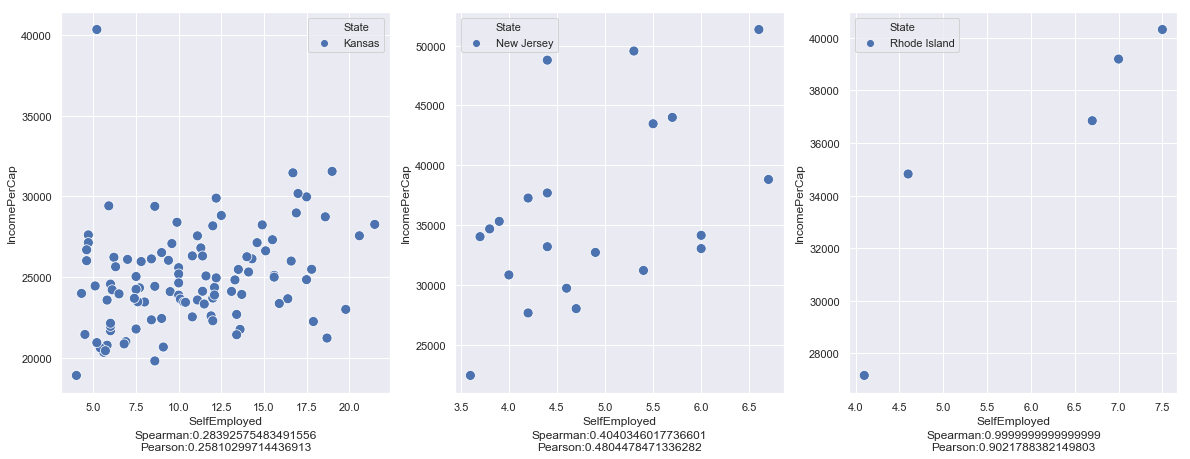

In [137]:
fig,ax = plt.subplots(1,3,figsize=(20,7))
datas = [Kansas,NJersey,RIsland]
names = ['Kansas','NJersey','RIsland']
for i in range(len(ax)):
    sns.scatterplot(x='SelfEmployed', y='IncomePerCap', hue="State", data=datas[i],ax=ax[i],s=100)
    coefficiencies = 'Spearman:'+str(eval('spearman'+names[i]))+'\nPearson:'+str(eval('pearson'+names[i]))
    ax[i].text(0.5,-0.15,coefficiencies,ha="center",transform=ax[i].transAxes)
    #ax[i].set_xlim(0,23)
    #ax[i].set_ylim(0,55000)

We can see that the coefficient of setB is larger than setA, and it's positive meaning that self employment has positive influence on income per capita, while setA coefficient is negative. So set B is recommended incentivizing self-employment.

However, we should also notice that there are fewer data points in setB, especially in New Jersey and Rhode island. To reach solid recommendation, more data points are needed.

Besides, from above plot we can also see the difference of Spearman and Pearson. First Spearman is less sensitive to outliers than Pearson (as in New Jersey, Spearman is smaller than Pearson). Second, in Rhode island we can easily see that Spearson is measurement of the monotonicity of two feature, because income per capita is strictly increased with selfemployment so the Spearman is almost 1. But the data points are not on a line, so the Pearson is less than 1.

## Task 2: All you need is love… And a dog!

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

**A)** Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. Standardize the values of each feature in the data to have mean 0 and variance 1. The use of external libraries is not permitted in part A, except for numpy and pandas.

**B)** Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold. The shelter has a limited capacity and has no other option but to put to sleep animals with a low probability of adoption. What metric (precision, recall, accuracy, or F1-score) and with respect to what class is the most relevant when choosing the threshold in this scenario, and why? Explain your reasoning.

**C)** Reduce the number of features by selecting the subset of the k best features. Use greedy backward selection to iteratively remove features. Evaluate performance and visualize the result using 5-fold cross-validation on the training set as a function of k, where k = 1, 5, 10, 15, 20, 25, 30. Choose the optimal k and justify your choice. Interpret the top-k features and their impact on the probability of adoption.

**D)** Train a random forest. Use 5-fold cross-validation on the training set to fine-tune the parameters of the classifier using a grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth". For the chosen parameters, estimate the performance of your classifier on the test set by presenting the confusion matrix, accuracy, precision, recall, and F1-score with respect to both classes and compare the performance with the performance of the logistic regression. Interpret the results.

You are allowed to use the scikit-learn library to implement your classifiers.

**A)** Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. Standardize the values of each feature in the data to have mean 0 and variance 1. The use of external libraries is not permitted in part A, except for numpy and pandas.


In [4]:
# load data and drop nan value
intake = pd.read_csv(data_folder+'aac_intakes_outcomes.csv.zip')
features = intake[['animal_type','intake_year','intake_condition','intake_number','intake_type',
                   'sex_upon_intake','age_upon_intake_(years)','time_in_shelter_days','sex_upon_outcome',
                  'age_upon_outcome_(years)','outcome_type']]
features = features.dropna()

In [5]:
# split the dataset into 20% and 80%
# same random seed ensuring that there is not overlapping in test set and training set
# and x,y has same index in test set and training set
x_te = features.drop(columns='outcome_type').sample(frac=0.2,random_state=10).reset_index().drop(columns='index')
x_tr = features.drop(columns='outcome_type').sample(frac=0.8,random_state=10).reset_index().drop(columns='index')

In [6]:
# remember not the get dummies of 'outcome_type', which should be used as labels but not features
# get dummies and standardization
x_te = pd.get_dummies(x_te).apply(lambda k: (k-np.mean(k))/np.std(k))
x_tr = pd.get_dummies(x_tr).apply(lambda k: (k-np.mean(k))/np.std(k))

In [7]:
# get labels y
y = pd.get_dummies(features['outcome_type']).Adoption
y_te = np.ravel(y.sample(frac=0.2,random_state=10).reset_index().drop(columns='index'))
y_tr = np.ravel(y.sample(frac=0.8,random_state=10).reset_index().drop(columns='index'))

**B)** Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold. The shelter has a limited capacity and has no other option but to put to sleep animals with a low probability of adoption. What metric (precision, recall, accuracy, or F1-score) and with respect to what class is the most relevant when choosing the threshold in this scenario, and why? Explain your reasoning.


In [8]:
def compute_confusion_matrix(true, predicted):
    '''
    Computes a confusion matrix using numpy for two np.arrays true and pred.
    
    Parameters:
        true: numpy array
        predicted: numpy array
        
    Return:
        confusion matrix with K number of classes
    '''
    
    K = len(np.unique(true)) # Number of classes 
    result = np.zeros((K, K))
    
    for i in range(len(true)):
        result[true[i]][predicted[i]] += 1
        
    return result

In [9]:
def calculate_accuracy(confusion_matrix):
    """
    Calculates model accuracy: Overall, how often is the classifier correct? 
    Same for positive and negative class.
    The formula: (TruePositives + TrueNegatives) / total

    Parameters:
        confusion_matrix: numpy array
        
    Return:
        model accuracy
    """
    return np.sum(np.diag(confusion_matrix))/np.sum(confusion_matrix)

In [10]:
def calculate_precision(confusion_matrix, precision_class):
    """
    Calculates model precision: When it predicts yes, how often is it correct? 
                                And vice versa, when it predicts no, how often is it correct?
    
    The formulas: TruePositives / (TruePositives + FalsePositives) or TP/predicted yes
                  TrueNegatives / (TrueNegatives + FalseNegatives) or TN/predicted no

    Parameters:
        confusion_matrix: numpy array
        precision_class: 0 for negative class or 1 for positive class
        
    Return:
        precision for desired class
    """
    # Precision for positive class
    if precision_class == 1:
        if np.sum(confusion_matrix[:,1]) != 0:
            precision_pos = confusion_matrix[1,1]/np.sum(confusion_matrix[:,1])
            return precision_pos
        else: 
            print('The classifier predicts all 0s and positive precision is not defined under this circumstance.')
            return np.nan
    
    # Precision for negative class
    elif precision_class == 0:
        if np.sum(confusion_matrix[:,0]) == 0:
            print('The classifier predicts all 1s and negative precision is not defined under this circumstance.')
            return np.nan
        else:
            return confusion_matrix[0,0]/np.sum(confusion_matrix[:,0])
    
    else:
        print('Input correct value for the precision class. (0 for negative and 1 for positive class)')

In [11]:
def calculate_recall(confusion_matrix, precision_class):
    """
    Calculates model recall: When it's actually yes, how often does it predict yes? 
                              And vice versa, when it's actually no, how often does it predict no?
                                
    The formulas: TruePositives / (TruePositives + FalseNegatives) or TP/actual yes
                  TrueNegatives / (TrueNegatives + FalsePositives) or TN/actual no

    Parameters:
        confusion_matrix: numpy array
        precision_class: 0 for negative class or 1 for positive class
        
    Return:
        recall for desired class
    """
    # Precision for positive class
    if precision_class == 1:
        return confusion_matrix[1,1]/np.sum(confusion_matrix[1,:])
    
    # Precision for negative class
    elif precision_class == 0:
        return confusion_matrix[0,0]/np.sum(confusion_matrix[0,:])
    
    else:
        print('Input correct value for the precision class. (0 for negative and 1 for positive class)')

In [12]:
def calculate_f1_score(confusion_matrix, precision_class):
    """
    Calculates model F1 score: Harmonic mean of precision and recall based on the confusion matrix and the precision class.
                       
    Parameters:
        confusion_matrix: numpy array
        precision_class: 0 for negative class or 1 for positive class
        
    Return:
        f1_score for desired class
    """
    # f1 score for positive class
    if precision_class == 1:
        if np.sum(confusion_matrix[:,1]) != 0:
            precision_pos = 2 * calculate_precision(confusion_matrix,1) * calculate_recall(confusion_matrix,1)\
                / (calculate_precision(confusion_matrix,1) + calculate_recall(confusion_matrix,1))
            return precision_pos
        else:
            print('The classifier predicts all 0s and positive f1 score is not defined under this circumstance.')
            return np.nan
    
    # f1 score for negative class
    elif precision_class == 0:
        if np.sum(confusion_matrix[:,0]) == 0:
            print('The classifier predicts all 1s and negative f1 score is not defined under this circumstance.')
            return np.nan
        else:
            return 2 * calculate_precision(confusion_matrix,0) * calculate_recall(confusion_matrix,0)\
                / (calculate_precision(confusion_matrix,0) + calculate_recall(confusion_matrix,0))
    
    else:
        print('Input correct value for the precision class. (0 for negative and 1 for positive class)')

In [13]:
def print_statisInfo(y_test, y_pred):
    """
    The function to calculate and print metrics for true label and predicts.
    
    Parameters:
        y_test: True labels.
        y_pred: Predicted labels.
        
    """
    confusion = compute_confusion_matrix(y_test, y_pred)
    print("The confusion matrix:\n{}\n".format(confusion))
    acc = calculate_accuracy(confusion)
    recall_p = calculate_recall(confusion,1)
    recall_n = calculate_recall(confusion,0)
    precision_p = calculate_precision(confusion,1)
    precision_n = calculate_precision(confusion,0)
    F_p = calculate_f1_score(confusion,1)
    F_n = calculate_f1_score(confusion,0)
    print("accuracy: {}\npositive recall: {}\npositive precision: {}\npositive F: {}".format(
        acc, recall_p, precision_p, F_p))
    print("negative recall: {}\nnegative precision: {}\nnegative F: {}".format(
        recall_n, precision_n, F_n))

For the decision threshold of 0.5, the performance of logistic classifier on the test is shown below. 

In [14]:
logistic = LogisticRegression(solver='liblinear')
y_pred_prob = logistic.fit(x_tr, y_tr).predict_proba(x_te)
y_pred = (y_pred_prob[:,1] >= 0.5).astype(int)
print_statisInfo(y_te, y_pred)

The confusion matrix:
[[7583. 1637.]
 [1246. 5466.]]

accuracy: 0.8190434345970374
positive recall: 0.8143623361144219
positive precision: 0.7695339997184288
positive F: 0.791313789359392
negative recall: 0.8224511930585683
negative precision: 0.8588741646845622
negative F: 0.8402681589007701


We calculate seven metrics (including 
`accuracy`, `negative precision`, `positive precision`, `negative recall`, `positive recall`, `negative f1 score`, `positive f1 score`) for different predict probability threshold (from 0 to 1 with interval 0.05).

In [15]:
logistic = LogisticRegression(solver='liblinear') # liblinear is suitable solver for small data set
# setting null list as default
acc, precision_n, precision_p, recall_n, recall_p, f1_score_n,f1_score_p, threshold  = ([] for i in range(8))
# compute metric for different threshold
for i in range(21):
    y_pred_prob = logistic.fit(x_tr, y_tr).predict_proba(x_te)
    y_pred =(y_pred_prob[:,1] >= i/20).astype(int)
    conf = compute_confusion_matrix(y_te, y_pred)
    acc.append(calculate_accuracy(conf))
    precision_n.append(calculate_precision(conf, 0))
    precision_p.append(calculate_precision(conf, 1))
    recall_n.append(calculate_recall(conf, 0))
    recall_p.append(calculate_recall(conf, 1))
    f1_score_n.append(calculate_f1_score(conf, 0))
    f1_score_p.append(calculate_f1_score(conf, 1))
    threshold.append(i/20)

The classifier predicts all 1s and negative precision is not defined under this circumstance.
The classifier predicts all 1s and negative f1 score is not defined under this circumstance.
The classifier predicts all 0s and positive precision is not defined under this circumstance.
The classifier predicts all 0s and positive f1 score is not defined under this circumstance.


In [16]:
metrics = pd.DataFrame([acc, precision_n, precision_p, recall_n,\
                        recall_p, f1_score_n, f1_score_p],\
                       index=['accuracy', 'precision_negative', 'precision_positive', 'recall_negative',\
                        'recall_positive', 'f1_score_negative', 'f1_score_positive'],\
                       columns=threshold)
metrics

,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,...,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0
accuracy,0.421290,0.588062,0.716420,0.744225,0.762428,0.778935,0.796385,0.809566,0.815466,0.819295,...,0.816721,0.813206,0.806678,0.785275,0.749749,0.701230,0.666081,0.624341,0.594966,0.578710
precision_negative,NaN,0.982564,0.961705,0.950604,0.941368,0.931405,0.919781,0.903997,0.885560,0.872781,...,0.843661,0.827254,0.805777,0.767112,0.718606,0.668633,0.638376,0.607539,0.588601,0.578710
precision_positive,0.421290,0.505653,0.601199,0.628974,0.649719,0.670991,0.696732,0.722209,0.742167,0.758045,...,0.780225,0.792240,0.808215,0.824109,0.843805,0.860414,0.878261,0.907969,0.908517,NaN
recall_negative,0.000000,0.293384,0.531128,0.588612,0.628633,0.667137,0.710087,0.750651,0.782213,0.805098,...,0.838720,0.855965,0.877440,0.903145,0.932863,0.959002,0.975705,0.991106,0.996855,1.000000
recall_positive,1.000000,0.992849,0.970948,0.957986,0.946216,0.932509,0.914928,0.890495,0.861144,0.838796,...,0.786502,0.754470,0.709476,0.623361,0.498212,0.347139,0.240763,0.120530,0.042908,0.000000
f1_score_negative,NaN,0.451850,0.684321,0.727041,0.753853,0.777427,0.801444,0.820218,0.830684,0.837574,...,0.841184,0.841365,0.840083,0.829589,0.811836,0.787917,0.771791,0.753308,0.740165,0.733142
f1_score_positive,0.592828,0.670052,0.742593,0.759374,0.770425,0.780424,0.791060,0.797571,0.797241,0.796379,...,0.783351,0.772894,0.755633,0.709814,0.626511,0.494692,0.377923,0.212811,0.081946,NaN


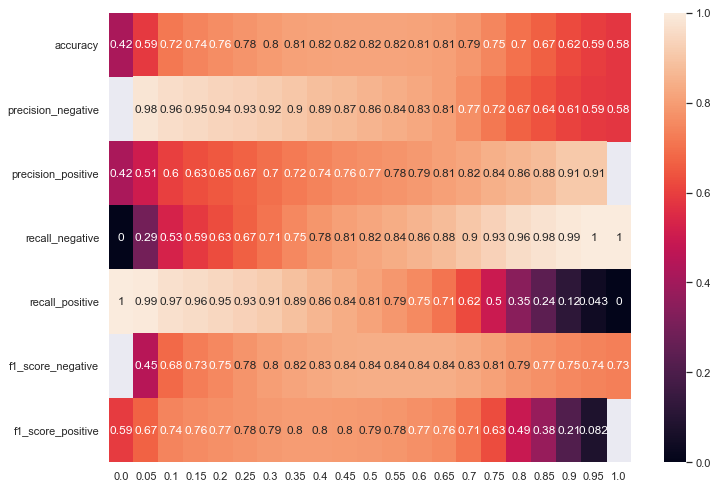

In [17]:
sns.heatmap(metrics.astype('float'),annot=True)

The gray rectagulars in precision_positive (negative) and f1_score_positive (negative) when threshold = 1 (0) means nan. It is natural because when threshold = 1 (0), the classfier always predicts 0s (1s) and the number of predicted 1s (0s) is zeros and these metrics are not defined. 

##### Q: *The shelter has a limited capacity and has no other option but to put to sleep animals with a low probability of adoption. What metric (precision, recall, accuracy, or F1-score) and with respect to what class is the most relevant when choosing the threshold in this scenario, and why? Explain your reasoning.*
 
A: Under this circumstance, the shelter will focus more on the a classifier with high accuracy and in the mean time can predict more not-adopted animals (in other words, higher proportion of TN/all negative = negative recall).

The highest accuracy is 0.82 and among them the highest negative recall is 0.84 and the corresponding threshold is 0.55.


**C)** Reduce the number of features by selecting the subset of the k best features. Use greedy backward selection to iteratively remove features. Evaluate performance and visualize the result using 5-fold cross-validation on the training set as a function of k, where k = 1, 5, 10, 15, 20, 25, 30. Choose the optimal k and justify your choice. Interpret the top-k features and their impact on the probability of adoption.


In [14]:
def build_k_indices(y, k_fold, seed=None):
    """
    Build k indices for k-fold.
    
    Parameters:
        y: Input label of training data.
        k_fold: Number of k fold cross validation.
        seed: Random seed. Default with none.
    
    Returns:
        k_indices: Shuffled index of each data fold.
    """
    num_row = len(y)
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)


In [15]:
def cross_validation(y_, x_, k_fold,k_indices, clf,metric_method,**kwargs):
    """
    Implement of cross validation.
    
    Parameters: 
        y_: Input label of training data.
        x_: Input training data.
        k_fold: Number of k fold cross validation.
        k_indices: Shuffled index of each data fold.
        clf: sklearn classifier, namely logistic or random forest.
        metric_method: Chosen metric to be used as selection criteris.
        **kwargs: Magic variables for metric_method.
    
    Returns:
        np.mean(cv_list): mean of cross validation metric (can be accuracy, precision, recall,F1 score).
    """
    cv_list = []
    for k in range(k_fold):
        test_idx = k_indices[k]
        train_idx = list(set(np.arange(0,len(y_)))-set(k_indices[k]))
        [x_train, y_train, x_test, y_test] = [x_.loc[train_idx], y_[train_idx], x_.loc[test_idx], y_[test_idx]]

        y_pred_tmp = clf.fit(x_train, y_train).predict(x_test)
        confusion_matrix = compute_confusion_matrix(y_test, y_pred_tmp)
        metric = metric_method(confusion_matrix,**kwargs)
        cv_list.append(metric)
    return np.mean(cv_list)

The basic idea of greedy backward selection is to select features by recursively considering smaller and smaller sets of features. We begin with initial data set and drop one feature per looping. The criteria to drop which feature is depended on the need of users. For example, in this homework, we choose accuracy as the valuation method. In every loop, we drop one feature from current features and calculate the classifier accuracy on test set, then we add back the dropped feature and drop next feature. After all current features have been dropped once in this loop, we get a list of different accuracies and we drop the feature without which the subset has highest accuracy. Then we continue same process until the number of remaining features meet the requirement.

In [16]:
def greedy_backward(k,x,y,k_fold,x_te,y_te,metric_method,**kwargs):
    """
    Implementation of greedy backward selection.
    
    Parameters:
        k: The number of features in final state.
        x: Input training data.
        y: Input label of training data.
        k_fold: Number of k fold cross validation.
        x_te: Input test data.
        y_te: Input label of test data.
        metric_method: Chosen metric to be used as selection criteris.
        **kwargs: Magic variables for metric_method.
    
    Returns:
        x_drop: The final left data set with k features.
        metric_te_list: List of metrics in each dropping on test set.
        drop_names: The names of dropped features in order.
    
    """
    clf = LogisticRegression(solver='liblinear')
    x_drop = x
    x_drop_te = x_te
    names = x_drop.columns
    drop_names = []
    metric_tr_list = []
    metric_te_list = []
    k_indices = build_k_indices(y,k_fold)
    while(len(names)>k): # looping until k features left
        for i in range(len(names)):
            x_drop_tmp = x_drop.drop(columns = names [i])
            cv_metric = cross_validation(y, x_drop_tmp, k_fold,k_indices, clf,metric_method,**kwargs) # calculate the metric with cross validation
            metric_tr_list.append(cv_metric)
        drop_idx = metric_tr_list.index(max(metric_tr_list)) # drop the feature with small metric
        print('The dropping feature is ',names[drop_idx])
        print('The metric for training set dropping this feature ',metric_tr_list[drop_idx])
        
        x_drop = x_drop.drop(columns = names [drop_idx])        
        x_drop_te = x_drop_te.drop(columns = names [drop_idx])
        y_pred_tmp = clf.fit(x_drop, y_tr).predict(x_drop_te)
        conf_matrix = compute_confusion_matrix(y_te, y_pred_tmp)
        metric_te = metric_method(conf_matrix,**kwargs)
        metric_te_list.append(metric_te)
        drop_names.append(names [drop_idx])
        print('The metric for test set dropping this feature ', metric_te)
        print('The confusion matrix is ')
        print(conf_matrix)
        
        names = x_drop.columns
        metric_tr_list = []

    return x_drop,metric_te_list,drop_names

Here we use accuracy as the evaluation method. One thing to notice is that, accuracy is used under the assumption that the data is normally distributed. Otherwise, for skewed data (eg. 10% are 1s and 90% are 0s) if the classifier always predicts 0 then the accuracy is still 90%. In this case, accuracy is not a good choice of metric.

To check if our data is severely skewed we can check in a simple way:

In [24]:
np.mean(y)

0.4217120046195755

Because there are only 0s and 1s in label y, the mean of y shows that there are 42% data labeled as '1', and 58% labeled as '0', and we can assume that the data is normally distributed and thus accuracy can be a good metric as evaluation.

In [17]:
x_drop,acc_te,acc_names = greedy_backward(k=1,x=x_tr,y=y_tr,k_fold=5,
                                         x_te=x_te,y_te=y_te,metric_method=calculate_accuracy)

The dropping feature is  age_upon_outcome_(years)
The metric for training set dropping this feature  0.8222361710474695
The metric for test set dropping this feature  0.8187923675621391
The confusion matrix is 
[[7582. 1638.]
 [1249. 5463.]]
The dropping feature is  intake_condition_Aged
The metric for training set dropping this feature  0.8222518634758729
The metric for test set dropping this feature  0.8187923675621391
The confusion matrix is 
[[7582. 1638.]
 [1249. 5463.]]
The dropping feature is  animal_type_Bird
The metric for training set dropping this feature  0.8222518634758729
The metric for test set dropping this feature  0.8187296008034145
The confusion matrix is 
[[7581. 1639.]
 [1249. 5463.]]
The dropping feature is  animal_type_Dog
The metric for training set dropping this feature  0.8225970969007452
The metric for test set dropping this feature  0.8187296008034145
The confusion matrix is 
[[7590. 1630.]
 [1258. 5454.]]
The dropping feature is  intake_type_Euthanasia Requ

In [18]:
ks = np.arange(1,len(x_tr.columns))
acc_te.reverse()
acc_names.reverse()

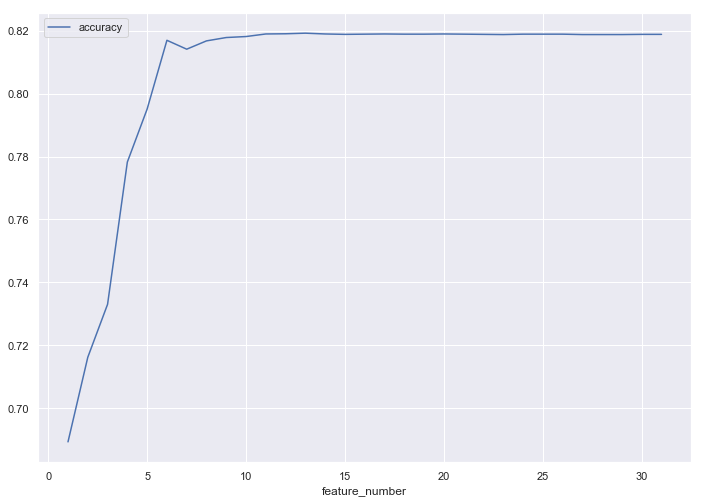

In [21]:
BS_score = pd.DataFrame([ks, acc_names,acc_te]).T
BS_score.columns = ['feature_number','feature_names','accuracy']
BS_score.plot(x ='feature_number', y='accuracy')

In [23]:
BS_score.loc[0:4]

,feature_number,feature_names,accuracy
0,1,sex_upon_outcome_Spayed Female,0.689367
1,2,sex_upon_outcome_Neutered Male,0.716231
2,3,sex_upon_intake_Spayed Female,0.733053
3,4,intake_type_Stray,0.778245
4,5,intake_type_Owner Surrender,0.795067


From the plot we can see that the top 5 features are most significant features. And from the dataframe above we know that these five features are `sex_upon_outcome_Spayed Female`, `sex_upon_outcome_Neutered Male`, `sex_upon_intake_Spayed Female`, `intake_type_Stray` and `intake_type_Owner Surrender	`.

And we can see that adopters have preference on animals with no fertility. Given that many pet owners will sterilize their pets, this observation coincides with reality, because adopters can save money and time for sterilization.

And animals taken from owner surrender and stray are preferred over animals from Euthanasia Request, Public Assist and Wildlife. The reason maybe that animals from owner surrender and stray are healthier and 'safer' to human owner.


**D)** Train a random forest. Use 5-fold cross-validation on the training set to fine-tune the parameters of the classifier using a grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth". For the chosen parameters, estimate the performance of your classifier on the test set by presenting the confusion matrix, accuracy, precision, recall, and F1-score with respect to both classes and compare the performance with the performance of the logistic regression. Interpret the results.


In [18]:
def get_best_parameters(para1,para2, metric):
    """
    Get the best degree and lambda from the result of grid search.
    
    Inputs:
        para1,para2:
        Range of parameters in numpy.array.
        
        metric:
        Metric matrix saving the valuation of performance of each combination of hyper-parameter.
    
    """
    max_row, max_col = np.unravel_index(np.argmax(metric), metric.shape)
    return metric[max_row, max_col], para1[max_row], para2[max_col]

In [19]:
def grid_search(y_, x_,para1,para2,metric_method,**kwargs):
    """
    Function implements grid search.
    
    Inputs:
        y,tx:
        Label and data for model training.
        
        para1,para2:
        Range of parameters in numpy.array.
    
    Result:
        acc_tr,acc_te:
        Average accuracy of 10-fold cross validation for training set and test set.
    """
    metric_te = np.zeros((len(para1), len(para2)))
    k_fold = 5
    k_indices = build_k_indices(y_,k_fold)
    for i in range(0,len(para1)):
        for j in range(0,len(para2)):
            clf = RandomForestClassifier(n_estimators=para1[i], max_depth=para2[j])
            metric_te[i][j] = cross_validation(y_, x_, k_fold,k_indices, clf,metric_method,**kwargs)
    return metric_te

In [22]:
n_estimators = [5,10,15,20,25,30,35,40]
max_depths = [1,4,7,10,13,16,19]
grid_rf = grid_search(y_tr, x_tr,n_estimators,max_depths,calculate_accuracy)

In [26]:
acc_gd, estimators, depth = get_best_parameters(n_estimators,max_depths, grid_rf)
print("The best parameter found by grid search is estimator number: {} and max depth: {}\n".format(
    estimators, depth))

The best parameter found by grid search is estimator number: 30 and max depth: 16



The performance of random forest with best parameter is shown as below.

In [30]:
rf = RandomForestClassifier(n_estimators=30, max_depth=16)
rf.fit(x_tr, y_tr)
print_statisInfo(y_te, rf.predict(x_te))

The confusion matrix:
[[7884. 1336.]
 [ 575. 6137.]]

accuracy: 0.8800527240773286
positive recall: 0.9143325387365911
positive precision: 0.8212230697176502
positive F: 0.8652802255904124
negative recall: 0.8550976138828633
negative precision: 0.9320250620640738
negative F: 0.8919056507721025


And the logistic regression performance is:

In [28]:
clf = LogisticRegression(solver='liblinear')
y_pred = clf.fit(x_tr, y_tr).predict(x_te)
print_statisInfo(y_te, y_pred)

The confusion matrix:
[[7587. 1633.]
 [1249. 5463.]]

accuracy: 0.819106201355762
positive recall: 0.8139153754469607
positive precision: 0.769870349492672
positive F: 0.7912804171494787
negative recall: 0.822885032537961
negative precision: 0.8586464463558171
negative F: 0.8403854674346478


We can see that we best parameter random forest performs better than logistic regression in all metrics. From the confusion metrix we find out random forest has significant decrease in the number of false negative and improves a lot in true positive.

Logistic regression is mainly used when we have certain clear linear boundary for our classfication. And after pd.get_dummies we finally get 32 features in our training set, which is very difficult to find a clear boundary. And random forest works well with non-linearity. It somewhat explains why random forest performs better than logistic regression in our data set.